In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
from src.data_preprocess import DataPreprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
###############################
### 1. Data Preprocessing  ###
###############################

# Load dataset
file_path = "data/Load_data_new.csv"
preprocessor = DataPreprocessing()

data = preprocessor.load_data(file_path)

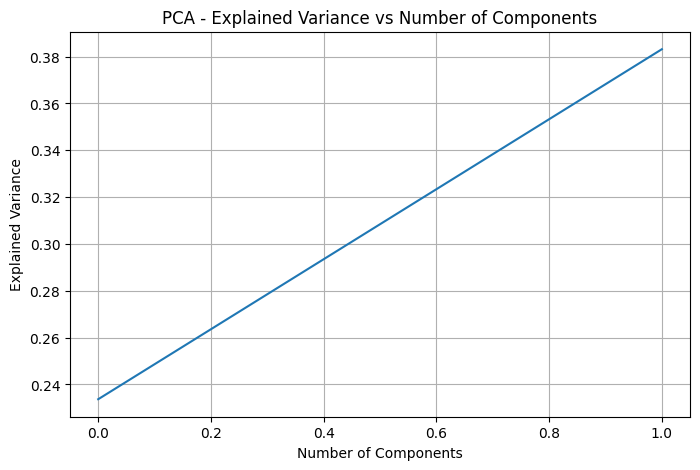

K-Means Silhouette Score: 0.342
DBSCAN Silhouette Score: 0.5914782667760922
HDBSCAN Silhouette Score: 0.35317640555900387
K-Means Davies-Bouldin Score: 0.970
HDBSCAN Davies-Bouldin Score: 1.751


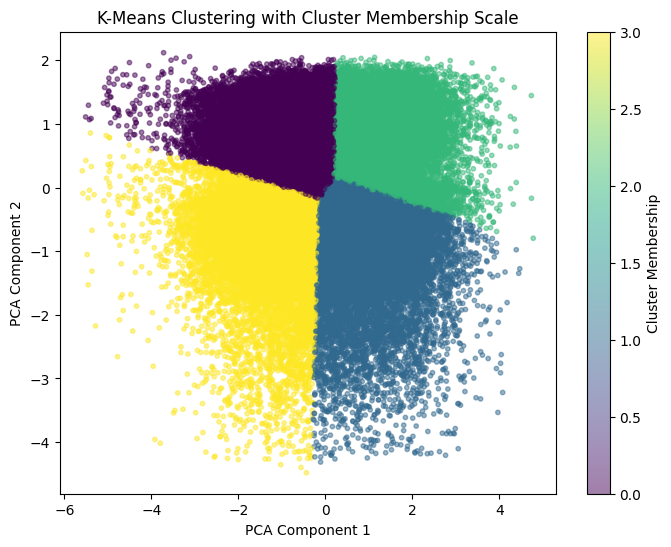

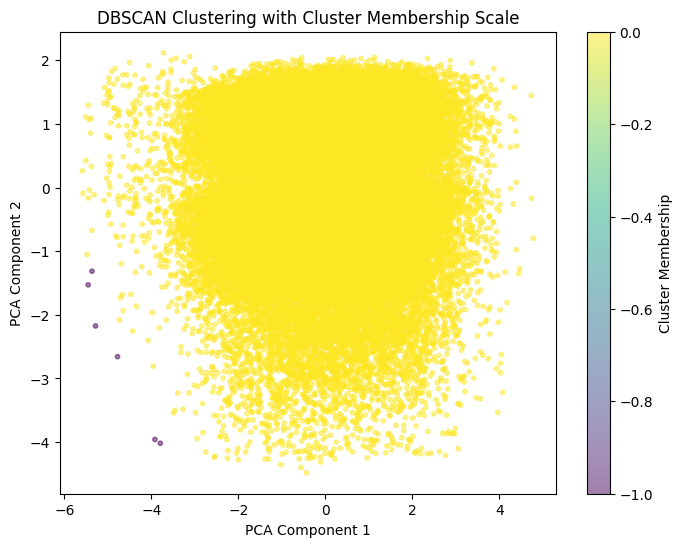

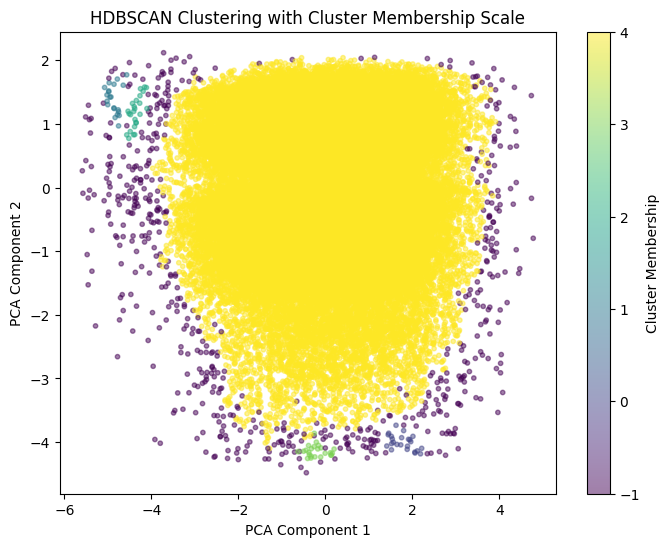

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

###############################
### 2. PCA for Dimensionality Reduction ###
###############################

# PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
save_path = 'plots'
# Visualizing explained variance to select optimal components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.savefig(os.path.join(save_path, 'PCA - Explained Variance vs Number of Components.png'))
plt.show()

###############################
### 3. Clustering Algorithms ###
###############################

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# HDBSCAN Clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)
hdbscan_labels = hdbscan_model.fit_predict(pca_data)

###############################
### 4. Evaluation ###
###############################

print(f"K-Means Silhouette Score: {silhouette_score(pca_data, kmeans_labels):.3f}")
print(f"DBSCAN Silhouette Score: {silhouette_score(pca_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'}")
print(f"HDBSCAN Silhouette Score: {silhouette_score(pca_data, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else 'N/A'}")

print(f"K-Means Davies-Bouldin Score: {davies_bouldin_score(pca_data, kmeans_labels):.3f}")
print(f"HDBSCAN Davies-Bouldin Score: {davies_bouldin_score(pca_data, hdbscan_labels):.3f}")

###############################
### 5. Visualization ###
###############################

# Visualization with Cluster Membership Scale
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10, alpha=0.5)
    plt.colorbar(scatter, label='Cluster Membership')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.savefig(os.path.join(save_path, title + ".png"))
    plt.show()

plot_clusters(pca_data, kmeans_labels, 'K-Means Clustering with Cluster Membership Scale')
plot_clusters(pca_data, dbscan_labels, 'DBSCAN Clustering with Cluster Membership Scale')
plot_clusters(pca_data, hdbscan_labels, 'HDBSCAN Clustering with Cluster Membership Scale')
